In [144]:
from collections.abc import Sequence
import platform
import sklearn
print(platform.python_version())
print(sklearn.__version__) 

3.7.9
0.19.1


In [145]:
import os
import sys

In [146]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [147]:
print(np.__version__)

1.19.2


In [148]:
#Question 1

In [149]:
cpu_loc = os.path.join(os.getcwd(),'data','regression_part1.csv')
cpu = pd.read_csv(cpu_loc)

In [150]:
#(a)
cpu.info()
#(focus on size, data ranges, data types)
#Data includes the exam scores and corresponding revising time of 49 students.
#For each student, revision time varies from 2.723 to 48.011 hours 
#and the exam score is between 27.682 and 86.968.
#Both exam scores and revising time are decimal, which is float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [151]:
#(b)
#original data before prepending 1 to x(i)
rt = cpu['revision_time'].values
#exam score
es = cpu['exam_score'].values
#prepend 1 to each of x(i)
#[1,x(i)], rt is the revising time for the exam
phi = [[1, 0]]*len(rt)
for i in range(len(rt)):
    phi[i] = [1,rt[i]]
reg = LinearRegression(fit_intercept=False)
reg.fit(phi,es)
es_predict = reg.predict(phi)
#w is estimated model parameters
w = reg.coef_
w

array([17.89768026,  1.44114091])

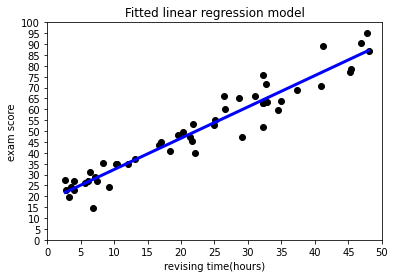

In [152]:
#(c)plot graph
plt.scatter(rt, es, color='black')
plt.plot(rt, es_predict, color='blue', linewidth=3)

plt.title('Fitted linear regression model')
plt.xlabel('revising time(hours)')
plt.ylabel('exam score')
plt.xlim(0,50)
plt.ylim(0,100)
x_axis = np.arange(0,51,5)
y_axis = np.arange(0,101,5)

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

In [153]:
#(d)closed form
w_cf = np.matmul(np.linalg.pinv(phi),es)
w_cf

array([17.89768026,  1.44114091])

In [154]:
#(e)MSE
#MSE equation(search online)
#One of the limitations of the MSE is that MSE is prone to outliers.(unfinished)

In [155]:
#(f)sklearn MSE
sklearn_MSE = mean_squared_error(es,es_predict)
sklearn_MSE

30.9854726145413

In [156]:
#(f)closed form MSE
cf_MSE = np.sum(np.square(es-es_predict))/(len(es))
cf_MSE

30.9854726145413

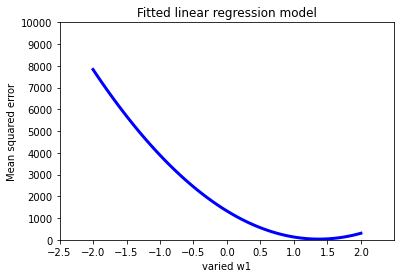

In [157]:
#(g)
w1 = np.linspace(-2,2,100)
w_MSE = []
for i in range(len(w1)):
    new_predict = []
    for j in range(len(phi)):
        w = [20,w1[i]]
        new_predict.append(np.matmul(phi[j], w))
    MSE = np.sum(np.square(es-new_predict))/(len(es))
    w_MSE.append(MSE)

#plot graph
#plt.scatter(rt, es, color='black')
plt.plot(w1, w_MSE, color='blue', linewidth=3)

plt.title('Fitted linear regression model')
plt.xlabel('varied w1')
plt.ylabel('Mean squared error')
plt.xlim(-2,2.5)
plt.ylim(0,10000)
x_axis = np.arange(-2.5,2.5,0.5)
y_axis = np.arange(0,10001,1000)

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

In [158]:
#Question2
data2_loc = os.path.join(os.getcwd(),'data','regression_part2.csv')
data2 = pd.read_csv(data2_loc)
x = data2['input'].values
y = data2['output'].values

In [159]:
# when M = 1
poly1 = PolynomialFeatures(degree=1)
x1_transform = poly1.fit_transform(x.reshape(-1,1))
poly1_reg = LinearRegression(fit_intercept=False)
poly1_reg.fit(x1_transform, y)
poly1_predict = poly1_reg.predict(x1_transform)

In [160]:
# when M = 2
poly2 = PolynomialFeatures(degree=2)
x2_transform = poly2.fit_transform(x.reshape(-1,1))
poly2_reg = LinearRegression(fit_intercept=False)
poly2_reg.fit(x2_transform, y)
poly2_predict = poly2_reg.predict(x2_transform)

In [161]:
# when M = 3
poly3 = PolynomialFeatures(degree=3)
x3_transform = poly3.fit_transform(x.reshape(-1,1))
poly3_reg = LinearRegression(fit_intercept=False)
poly3_reg.fit(x3_transform, y)
poly3_predict = poly3_reg.predict(x3_transform)

In [162]:
# when M = 4
poly4 = PolynomialFeatures(degree=4)
x4_transform = poly4.fit_transform(x.reshape(-1,1))
poly4_reg = LinearRegression(fit_intercept=False)
poly4_reg.fit(x4_transform, y)
poly4_predict = poly4_reg.predict(x4_transform)

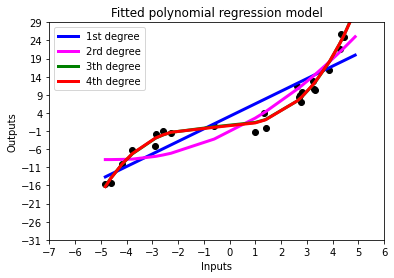

In [163]:
#When M = 4
plt.scatter(x, y, color='black')
plt.plot(np.sort(x,axis=0), np.sort(poly1_predict,axis=0), color='blue', linewidth=3, label='1st degree')
plt.plot(np.sort(x,axis=0), np.sort(poly2_predict,axis=0), color='fuchsia', linewidth=3, label='2rd degree')
plt.plot(np.sort(x,axis=0), np.sort(poly3_predict,axis=0), color='green', linewidth=3, label='3th degree')
plt.plot(np.sort(x,axis=0), np.sort(poly4_predict,axis=0), color='red', linewidth=3, label='4th degree')

plt.title('Fitted polynomial regression model')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.xlim(-5,5)
plt.ylim(-25,25)
x_axis = np.arange(-7,7,1)
y_axis = np.arange(-31,31,5)
plt.legend()

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

In [164]:
#(b)
mse_poly1 = mean_squared_error(y, poly1_predict)
mse_poly2 = mean_squared_error(y, poly2_predict)
mse_poly3 = mean_squared_error(y, poly3_predict)
mse_poly4 = mean_squared_error(y, poly4_predict)

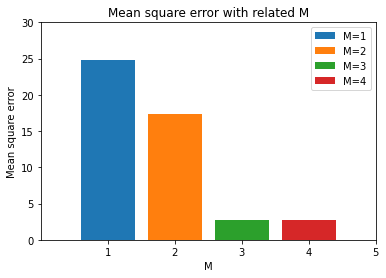

In [165]:
#When M = 1
bar1 = plt.bar(x=1, height=mse_poly1)
bar2 = plt.bar(x=2, height=mse_poly2)
bar3 = plt.bar(x=3, height=mse_poly3)
bar4 = plt.bar(x=4, height=mse_poly4)
valueList = [mse_poly1, mse_poly2, mse_poly3, mse_poly4]
plt.title('Mean square error with related M')
plt.xlabel('M')
plt.ylabel('Mean square error')
plt.xlim(0,5)
plt.ylim(0,30)
x_axis = np.arange(1,6,1)
y_axis = np.arange(0,31,5)
plt.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('M=1', 'M=2', 'M=3', 'M=4'))

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

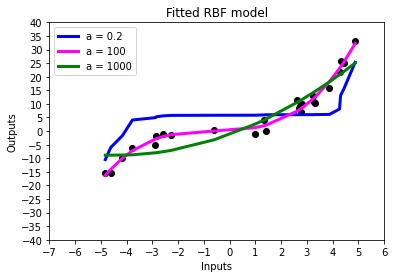

In [166]:
#(c)
#(d)
c = [-4.0, -2.0, 2.0, 4.0]
a = [0.2, 100, 1000]
a_phis = []
for i in range(len(a)):
    phi_lis = []
    for k in range(len(x)):
        phi = [1]
        for j in range(len(c)):
            rbf = np.exp(-0.5*np.square(x[k]-c[j])/np.square(a[i]))
            phi.append(rbf)
        phi_lis.append(phi)
    a_phis.append(phi_lis)
 
#plot graph
regs = LinearRegression(fit_intercept=False)
regs.fit(a_phis[0], y)
predict_a1 = regs.predict(a_phis[0])

regs.fit(a_phis[1], y)
predict_a2 = regs.predict(a_phis[1])

regs.fit(a_phis[2], y)
predict_a3 = regs.predict(a_phis[2])

#When M = 4
plt.scatter(x, y, color='black')
plt.plot(np.sort(x,axis=0), np.sort(predict_a1,axis=0), color='blue', linewidth=3, label='a = 0.2')
plt.plot(np.sort(x,axis=0), np.sort(predict_a2,axis=0), color='fuchsia', linewidth=3, label='a = 100')
plt.plot(np.sort(x,axis=0), np.sort(predict_a3,axis=0), color='green', linewidth=3, label='a = 1000')

plt.title('Fitted RBF model')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.xlim(-5,5)
plt.ylim(-35,35)
x_axis = np.arange(-7,7,1)
y_axis = np.arange(-40,41,5)
plt.legend()

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

In [249]:
#Question3
#(a)
data3_train_loc = os.path.join(os.getcwd(),'data','faces_train_data.csv')
data3_train = pd.read_csv(data3_train_loc)
data3_test_loc = os.path.join(os.getcwd(),'data','faces_test_data.csv')
data3_test = pd.read_csv(data3_test_loc)

x_train = data3_train.iloc[ :, :-1]
y_train = data3_train.iloc[ :, -1:]
x_test = data3_test.iloc[ :, :-1]
y_test = data3_test.iloc[ :, -1:]

smile_train = data3_train[data3_train['smiling']==1]
nonsmile_train = data3_train[data3_train['smiling']==0]
smile_test = data3_test[data3_test['smiling']==1]
nonsmile_test = data3_test[data3_test['smiling']==0]

In [250]:
smile = smile_train.iloc[1167]
smile = smile.values

nonsmile = nonsmile_train.iloc[1232]
nonsmile = nonsmile.values

In [251]:
row = smile
cord = []
smile_cord_x = []
smile_cord_y = []
for j in range (0,68*2,2):
    smile_cord_x.append(row[j])
    smile_cord_y.append(row[j+1])
    cord.append([row[j],row[j+1]])

In [252]:
row2 = nonsmile
cord2 = []
nonsmile_cord_x = []
nonsmile_cord_y = []
for j in range (0,68*2,2):
    nonsmile_cord_x.append(row2[j])
    nonsmile_cord_y.append(row2[j+1])
    cord2.append([row2[j],row2[j+1]])

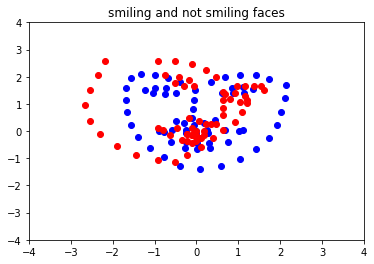

In [258]:
plt.scatter(smile_cord_x,smile_cord_y,color = "blue")
plt.scatter(nonsmile_cord_x,nonsmile_cord_y,color = "red")
plt.title('smiling and not smiling faces')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-4,4)
plt.ylim(-4,4)
x_axis = np.arange(-4,5,1)
y_axis = np.arange(-4,5,1)

plt.xticks(x_axis)
plt.yticks(y_axis)

plt.show()

In [256]:
#(e)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

smileModel_2 = DecisionTreeClassifier(random_state=2001,max_depth=2).fit(x_train,y_train)
smilePredict_2 = smileModel_2.predict(x_test)

accuracy_test_2 = accuracy_score(y_test, smilePredict_2)
print("test accuracy of depth 2: " + str(accuracy_test_2))

smilePredict_2 = smileModel_2.predict(x_train)
accuracy_train_2 = accuracy_score(y_train, smilePredict_2)
print("train accuracy of depth 2: " + str(accuracy_train_2))

test accuracy of depth 2: 0.7816666666666666
train accuracy of depth 2: 0.7947916666666667


In [257]:
smileModel_8 = DecisionTreeClassifier(random_state=2001,max_depth=8).fit(x_train,y_train)
smilePredict_8 = smileModel_8.predict(x_test)
accuracy_test_8 = accuracy_score(y_test, smilePredict_8)
print("test accuracy of depth 8: " + str(accuracy_test_8))

smilePredict_8 = smileModel_8.predict(x_train)
accuracy_train_8 = accuracy_score(y_train, smilePredict_8)
print("train accuracy of depth 8: " + str(accuracy_train_8))

test accuracy of depth 8: 0.8408333333333333
train accuracy of depth 8: 0.9335416666666667


In [175]:
smileModel_20 = DecisionTreeClassifier(random_state=2001,max_depth=20).fit(x_train,y_train)
smilePredict_20 = smileModel_20.predict(x_test)
accuracy_test_20 = accuracy_score(y_test, smilePredict_20)
print("test accuracy of depth 20: " + str(accuracy_test_20))

smilePredict_20 = smileModel_20.predict(x_train)
accuracy_train_20 = accuracy_score(y_train, smilePredict_20)
print("train accuracy of depth 8: " + str(accuracy_train_20))

test accuracy of depth 20: 0.8158333333333333
train accuracy of depth 8: 1.0


In [291]:
#(f)
smileModel_8_f = DecisionTreeClassifier(criterion = 'gini', random_state=2001, max_depth=8)
smileModel_8_f.fit(x_train,y_train)
features = smileModel_8_f.feature_importances_
f_lis = []
for i in range(1,(len(features)+1)):
   f_lis.append([i,features[i-1]])

f_lis = sorted(f_lis, key=lambda x: x[1])
f_lis = f_lis[::-1]
top1 = f_lis[0]
top2 = f_lis[1]
top3 = f_lis[2]

top1_index = top1[0]
top2_index = top2[0]
top3_index = top3[0]

print("1st important feature: " + str(top1))
print("2nd important feature: " + str(top2))
print("3rd important feature: " + str(top3))
#1st important feature: 0.33040484928175073 -x50,y50
#2nd important feature: 0.08995881431599788 -x48,y48
#3rd important feature: 0.08831447209293988 -x29,y29
len(f_lis)

1st important feature: [101, 0.33040484928175073]
2nd important feature: [98, 0.08995881431599788]
3rd important feature: [60, 0.08831447209293988]


136

In [295]:
x_train

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,0.183,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,0.218,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,0.310,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,0.283,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,0.207,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131
5,-2.619,1.026,-2.483,0.545,-2.347,0.064,-2.143,-0.449,-1.871,-0.866,...,0.204,-0.096,0.578,-0.000,0.238,-0.289,0.034,-0.385,-0.204,-0.385
6,-1.690,1.463,-1.690,1.024,-1.667,0.585,-1.576,0.125,-1.393,-0.313,...,0.297,-0.084,1.028,-0.000,0.320,-0.418,0.023,-0.460,-0.251,-0.418
7,0.237,1.515,-0.068,1.267,-0.271,0.909,-0.338,0.523,-0.406,0.138,...,0.102,-0.193,0.575,-0.661,-0.068,-0.661,-0.237,-0.551,-0.338,-0.441
8,-2.405,1.848,-2.405,1.299,-2.405,0.780,-2.315,0.231,-2.074,-0.260,...,0.180,-0.058,0.571,0.029,0.180,-0.058,0.000,-0.087,-0.210,-0.058
9,-2.008,1.898,-1.971,1.432,-1.858,0.965,-1.708,0.515,-1.502,0.080,...,0.244,-0.113,0.638,-0.064,0.244,-0.129,0.000,-0.161,-0.244,-0.145


In [262]:
#Question4(a)
data4_loc = os.path.join(os.getcwd(),'data','classification_eval_1.csv')
data4 = pd.read_csv(data4_loc)

In [178]:
alg_1 = data4['alg_1'].values
alg_2 = data4['alg_2'].values
alg_3 = data4['alg_3'].values
alg_4 = data4['alg_4'].values

gt = data4['gt'].values

alg_1_threshold = []
alg_2_threshold = []
alg_3_threshold = []
alg_4_threshold = []

for i in range(len(alg_1)):
    if alg_1[i]>=0.5:
        alg_1_threshold.append(1)
    else:
        alg_1_threshold.append(0)
        
    if alg_2[i]>=0.5:
        alg_2_threshold.append(1)
    else:
        alg_2_threshold.append(0)
        
    if alg_3[i]>=0.5:
        alg_3_threshold.append(1)
    else:
        alg_3_threshold.append(0)
        
    if alg_4[i]>=0.5:
        alg_4_threshold.append(1)
    else:
        alg_4_threshold.append(0)
        
accuracy_1 = accuracy_score(gt, alg_1_threshold)
accuracy_2 = accuracy_score(gt, alg_2_threshold)
accuracy_3 = accuracy_score(gt, alg_3_threshold)
accuracy_4 = accuracy_score(gt, alg_4_threshold)

print("Accuracy of alg_1: " + str(accuracy_1))
print("Accuracy of alg_2: " + str(accuracy_2))
print("Accuracy of alg_3: " + str(accuracy_3))
print("Accuracy of alg_4: " + str(accuracy_4))

Accuracy of alg_1: 0.616
Accuracy of alg_2: 0.55
Accuracy of alg_3: 0.321
Accuracy of alg_4: 0.329


In [179]:
from sklearn.metrics import roc_auc_score
RUC1 = roc_auc_score(gt, alg_1_threshold)
RUC2 = roc_auc_score(gt, alg_2_threshold)
RUC3 = roc_auc_score(gt, alg_3_threshold)
RUC4 = roc_auc_score(gt, alg_4_threshold)

print("RUC of alg_1: " + str(RUC1))
print("RUC of alg_2: " + str(RUC2))
print("RUC of alg_3: " + str(RUC3))
print("RUC of alg_4: " + str(RUC4))

RUC of alg_1: 0.6799052085659694
RUC of alg_2: 0.599729521824363
RUC of alg_3: 0.20112781954887216
RUC of alg_4: 0.5795739348370927


In [180]:
from sklearn import metrics
metrics.roc_curve(gt, alg_4_threshold)

(array([0.        , 0.84085213, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0]))

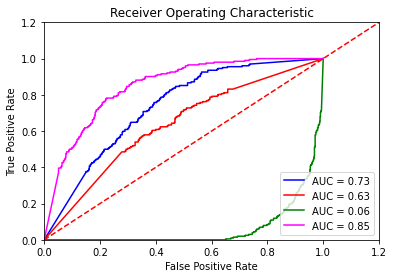

In [181]:
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(gt, alg_1)
fpr2, tpr2, threshold2 = metrics.roc_curve(gt, alg_2)
fpr3, tpr3, threshold3 = metrics.roc_curve(gt, alg_3)
fpr4, tpr4, threshold4 = metrics.roc_curve(gt, alg_4)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)

plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1, color = 'blue')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2, color = 'red')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3, color = 'green')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4, color = 'fuchsia')

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1.2], [0, 1.2],'r--')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


plt.show()

In [182]:
print(roc_auc1)
print(roc_auc2)
print(roc_auc3)
print(roc_auc4)

0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644
